In [4]:
# Importieren der nötigen Bibliotheken. 
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep

# Konfigurieren von Matplotlib
plt.style.use('fivethirtyeight')
plt.rcParams['pdf.fonttype'] = 42
%matplotlib inline

In [5]:
# Ausgeselesen werden die untenstehenden Tage für einen Standort in Bern
eisheilige = {'Pankratius': '05-12', 'Servatius': '05-13', 'Bonifatius': '05-14', 'Sophia': '05-15'}
lat_bern = "46.96334"
lon_bern = "7.43911"
api_key = 'XXXXX'

In [8]:
# Die Daten für die Eisheiligen werden über die Api von Forecast.io (Dark Sky) ausgelesen. 
temp_dict_min = dict()
temp_dict_max = dict()
temp_dict_all = dict()
for eisheiliger in eisheilige: 
    temp_minimum = dict()
    temp_maximum = dict()
    temp_all = dict()
    print('Arbeite an', eisheiliger)
    for jahr in range(1977,2017):
        temp_abfragestring = str(jahr) + '-' + eisheilige[eisheiliger] + 'T12:00:00' + '?lang=de' + '&units=auto'
        response = requests.get('https://api.forecast.io/forecast/' + api_key + '/' +
                                lat_bern + ',' + lon_bern + ',' +  temp_abfragestring)
        data_bern = response.json()
        temp_minimum[jahr] = pd.DataFrame(data_bern['hourly']['data'])['temperature'].min()
        temp_maximum[jahr] = pd.DataFrame(data_bern['hourly']['data'])['temperature'].max()
        temp_all[jahr] = pd.DataFrame(data_bern['hourly']['data'])['temperature']
        sleep(6)
    temp_dict_min[eisheiliger] = temp_minimum
    temp_dict_max[eisheiliger] = temp_maximum
    temp_dict_all[eisheiliger] = temp_all
    sleep(20)
df_minimum = pd.DataFrame(temp_dict_min)
df_maximum = pd.DataFrame(temp_dict_max)
df_all = pd.DataFrame(temp_dict_all)

Arbeite an Pankratius
Arbeite an Bonifatius
Arbeite an Sophia
Arbeite an Servatius


In [263]:
df_minimum.head()

,Bonifatius,Mamertus,Pankratius,Servatius,Sophia
1977,2.46,5.22,5.20,4.50,2.22
1978,1.53,1.54,1.34,1.22,3.01
1979,7.00,3.49,8.29,5.88,6.06
1980,6.30,2.78,5.00,6.11,3.65
1981,6.27,5.98,2.78,5.86,6.54


In [193]:
# Wann gab es an den Eisheiligen Lufttemperaturen unter 4 Grad? Wie viele waren es? 
anzahl_frosttage = list()

for eisheiliger in eisheilige:
    if eisheiliger != 'Mamertus':
        print(eisheiliger)
        print(df_minimum[df_minimum[eisheiliger] <= 4][eisheiliger])
        print('Anzahl unter 4 Grad:', len(df_minimum[df_minimum[eisheiliger] <= 4][eisheiliger]))
        anzahl_frosttage.append(len(df_minimum[df_minimum[eisheiliger] <= 4][eisheiliger]))
        print('\n')        

Servatius
1978    1.22
1982    3.89
1984    2.98
1987    1.09
1989    3.95
1991    2.58
1995    0.67
Name: Servatius, dtype: float64
Anzahl unter 4 Grad: 7


Sophia
1977    2.22
1978    3.01
1980    3.65
1984    0.24
1987    3.16
1989    0.53
1991    2.56
1995   -1.42
2003    0.62
2012    3.19
2014    3.28
2015    3.86
Name: Sophia, dtype: float64
Anzahl unter 4 Grad: 12


Pankratius
1978    1.34
1981    2.78
1982    3.42
1983    3.69
1984    1.80
1992    2.72
2005    3.45
Name: Pankratius, dtype: float64
Anzahl unter 4 Grad: 7


Bonifatius
1977    2.46
1978    1.53
1984    3.56
1987    0.73
1989    3.29
1991    3.25
1995    0.04
2003    2.87
2012    1.14
Name: Bonifatius, dtype: float64
Anzahl unter 4 Grad: 9




In [194]:
# An wievielen Eisheiligen wurden Lufttemperaturwerte unter 4 Grad gemessen?
sum(anzahl_frosttage)

35

In [197]:
# An wievielen Prozent der Eisheiligen wurden Lufttemperaturen unter 4 Grad gemessen?
100 * sum(anzahl_frosttage) / (4 * len(range(1977,2017)))

21.875

In [199]:
# Analyse der Tiefstwerte. 
df_minimum.describe()

,Bonifatius,Mamertus,Pankratius,Servatius,Sophia
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,6.580750,6.633500,6.879500,6.728750,5.979250
std,3.102376,3.034196,2.948415,2.930837,3.143452
min,0.040000,0.180000,1.340000,0.670000,-1.420000
25%,4.757500,4.670000,4.412500,5.670000,3.557500
50%,6.715000,6.280000,6.860000,6.520000,6.010000
75%,8.890000,9.290000,9.017500,8.122500,8.765000
max,13.090000,12.080000,12.390000,13.310000,11.730000


In [205]:
# Durchschnittliche Mindesttemperatur an allen Eisheiligen. 
sum([df_minimum['Bonifatius'].mean(), df_minimum['Pankratius'].mean(), df_minimum['Servatius'].mean(), df_minimum['Sophia'].mean()]) / 4

6.5420625000000001

In [209]:
# Doch wie sehen die Maxima aus? 
anzahl_sommertage = list()

for eisheiliger in eisheilige:
    if eisheiliger != 'Mamertus':
        print(eisheiliger)
        print(df_maximum[df_maximum[eisheiliger] > 25][eisheiliger])
        print('Anzahl über 25 Grad:', len(df_maximum[df_maximum[eisheiliger] > 25][eisheiliger]))
        anzahl_sommertage.append(len(df_maximum[df_maximum[eisheiliger] > 25][eisheiliger]))
        print('\n')  

Servatius
1998    27.36
2015    27.70
Name: Servatius, dtype: float64
Anzahl über 25 Grad: 2


Sophia
1982    26.11
1992    25.37
Name: Sophia, dtype: float64
Anzahl über 25 Grad: 2


Pankratius
1998    28.89
2015    27.78
Name: Pankratius, dtype: float64
Anzahl über 25 Grad: 2


Bonifatius
1992    26.11
1998    26.02
Name: Bonifatius, dtype: float64
Anzahl über 25 Grad: 2




In [268]:
# Wieviele Sommertage gab es an den Eisheiligen? 
sum(anzahl_sommertage)

8

In [237]:
# Wie sieht es bei den Mittelwerten aus?
mittelwerte_jahr = dict()
for jahr in range(1977,2017):
    mittelwerte = dict()
    for eisheiliger in eisheilige:
        mittelwerte[eisheiliger] = df_all.loc[jahr][eisheiliger].mean()
    mittelwerte_jahr[jahr] = mittelwerte
df_mittelwerte = pd.DataFrame(mittelwerte_jahr).transpose()
df_mittelwerte

,Bonifatius,Pankratius,Servatius,Sophia
1977,8.615833,11.920833,10.303750,9.614583
1978,8.432917,6.685833,7.312917,8.137083
1979,14.211250,14.265000,12.824583,15.495417
1980,11.444583,13.432083,14.216250,9.694167
1981,11.925417,10.189167,11.520833,12.572083
1982,14.262500,11.712083,13.041250,15.415417
1983,12.211667,10.610000,9.378750,12.222083
1984,8.201667,6.277917,6.221667,9.792083
1985,12.862917,10.942500,12.559583,13.487917
1986,14.423333,16.603750,16.972917,12.442500


In [240]:
df_mittelwerte.describe()

,Bonifatius,Pankratius,Servatius,Sophia
count,40.000000,40.000000,40.000000,40.000000
mean,11.728729,11.601688,11.699831,11.235375
std,3.422536,2.939009,3.574337,3.343724
min,3.490000,6.277917,5.408750,6.310417
25%,8.938958,10.214792,9.008750,8.405208
50%,12.301042,10.892292,11.842917,11.417708
75%,14.200000,13.459479,14.175937,13.491979
max,18.156250,18.731667,20.542083,18.431667


In [246]:
sum([11.728729,11.601688,11.699831,11.235375]) / 4

11.56640575

## Angepassung Julianischer Kalender
Die Eisheiligen stammen aus dem Mittelalter -- aus der Zeit vor der Einführung des Gregorianischen Kalenders. Die Daten wurden aber nicht angepasst. Doch wie sieht es mit der Kälte an den "richtigen" Daten aus? 

In [247]:
eisheilige_gregor = {'Pankratius': '05-25', 'Servatius': '05-26', 'Bonifatius': '05-27', 'Sophia': '05-28'}
lat_bern = "46.96334"
lon_bern = "7.43911"

In [269]:
temp_dict_min = dict()
temp_dict_max = dict()
temp_dict_all = dict()
for eisheiliger in eisheilige_gregor: 
    temp_minimum = dict()
    temp_maximum = dict()
    temp_all = dict()
    print('Arbeite an', eisheiliger)
    for jahr in range(1977,2017):
        temp_abfragestring = str(jahr) + '-' + eisheilige_gregor[eisheiliger] + 'T12:00:00' + '?lang=de' + '&units=auto'
        response = requests.get('https://api.forecast.io/forecast/' + api_key + '/' +
                                lat_bern + ',' + lon_bern + ',' +  temp_abfragestring)
        data_bern = response.json()
        temp_minimum[jahr] = pd.DataFrame(data_bern['hourly']['data'])['temperature'].min()
        temp_maximum[jahr] = pd.DataFrame(data_bern['hourly']['data'])['temperature'].max()
        temp_all[jahr] = pd.DataFrame(data_bern['hourly']['data'])['temperature']
        sleep(2)
    temp_dict_min[eisheiliger] = temp_minimum
    temp_dict_max[eisheiliger] = temp_maximum
    temp_dict_all[eisheiliger] = temp_all
    sleep(20)
df_minimum_gregor = pd.DataFrame(temp_dict_min)
df_maximum_gregor = pd.DataFrame(temp_dict_max)
df_all_gregor = pd.DataFrame(temp_dict_all)

Arbeite an Servatius
Arbeite an Sophia
Arbeite an Pankratius
Arbeite an Bonifatius


In [271]:
df_minimum_gregor

,Bonifatius,Pankratius,Servatius,Sophia
1977,7.78,8.64,11.41,3.89
1978,7.22,6.37,7.94,7.24
1979,7.22,4.47,6.67,7.22
1980,7.99,1.97,4.49,7.02
1981,4.34,6.60,4.74,5.41
1982,11.11,3.09,6.78,10.96
1983,2.73,1.53,1.77,3.06
1984,3.75,5.80,6.05,3.18
1985,11.69,8.19,10.87,10.62
1986,12.55,6.11,10.00,9.28


In [277]:
anzahl_frosttage = list()

for eisheiliger in eisheilige_gregor:
    print(eisheiliger)
    print(df_minimum_gregor[df_minimum_gregor[eisheiliger] <= 4][eisheiliger])
    print('Anzahl unter 4 Grad:', len(df_minimum_gregor[df_minimum_gregor[eisheiliger] <= 4][eisheiliger]))
    anzahl_frosttage.append(len(df_minimum_gregor[df_minimum_gregor[eisheiliger] <= 4][eisheiliger]))
    print('\n')    

Servatius
1983    1.77
Name: Servatius, dtype: float64
Anzahl unter 4 Grad: 1


Sophia
1977    3.89
1983    3.06
1984    3.18
1990    3.39
2002    3.68
Name: Sophia, dtype: float64
Anzahl unter 4 Grad: 5


Pankratius
1980    1.97
1982    3.09
1983    1.53
1991    2.20
1998    3.89
2004    3.24
2013    1.85
Name: Pankratius, dtype: float64
Anzahl unter 4 Grad: 7


Bonifatius
1983    2.73
1984    3.75
1990    3.26
Name: Bonifatius, dtype: float64
Anzahl unter 4 Grad: 3




In [278]:
# An wievielen Prozent der Eisheiligen wurden Lufttemperaturen unter 4 Grad gemessen?
100 * sum(anzahl_frosttage) / (4 * len(range(1977,2017)))

10.0

In [279]:
# Durchschnittliche Mindesttemperatur an allen Eisheiligen. 
sum([df_minimum_gregor['Bonifatius'].mean(), df_minimum_gregor['Pankratius'].mean(), df_minimum_gregor['Servatius'].mean(), df_minimum_gregor['Sophia'].mean()]) / 4

8.2799999999999994

In [255]:
df_minimum_gregor.describe()

,Bonifatius,Pankratius,Servatius,Sophia
count,40.000000,40.000000,40.000000,40.000000
mean,6.580750,6.879500,6.728750,5.979250
std,3.102376,2.948415,2.930837,3.143452
min,0.040000,1.340000,0.670000,-1.420000
25%,4.757500,4.412500,5.670000,3.557500
50%,6.715000,6.860000,6.520000,6.010000
75%,8.890000,9.017500,8.122500,8.765000
max,13.090000,12.390000,13.310000,11.730000


In [257]:
df_maximum_gregor.describe()

,Bonifatius,Pankratius,Servatius,Sophia
count,40.000000,40.00000,40.000000,40.000000
mean,16.793000,16.78700,17.005750,16.829500
std,4.622056,4.52351,5.223128,4.980877
min,6.420000,8.68000,8.790000,8.130000
25%,13.890000,13.69750,12.337500,12.922500
50%,16.685000,17.03000,16.945000,16.120000
75%,19.277500,19.06000,20.910000,20.390000
max,26.110000,28.89000,27.700000,26.110000


In [280]:
# Wie sieht es bei den Mittelwerten aus?
mittelwerte_jahr = dict()
for jahr in range(1977,2017):
    mittelwerte = dict()
    for eisheiliger in eisheilige:
        mittelwerte[eisheiliger] = df_all.loc[jahr][eisheiliger].mean()
    mittelwerte_jahr[jahr] = mittelwerte
df_mittelwerte_gregor = pd.DataFrame(mittelwerte_jahr).transpose()
df_mittelwerte_gregor

,Bonifatius,Pankratius,Servatius,Sophia
1977,8.615833,11.920833,10.303750,9.614583
1978,8.432917,6.685833,7.312917,8.137083
1979,14.211250,14.265000,12.824583,15.495417
1980,11.444583,13.432083,14.216250,9.694167
1981,11.925417,10.189167,11.520833,12.572083
1982,14.262500,11.712083,13.041250,15.415417
1983,12.211667,10.610000,9.378750,12.222083
1984,8.201667,6.277917,6.221667,9.792083
1985,12.862917,10.942500,12.559583,13.487917
1986,14.423333,16.603750,16.972917,12.442500


In [281]:
df_mittelwerte_gregor.describe()

,Bonifatius,Pankratius,Servatius,Sophia
count,40.000000,40.000000,40.000000,40.000000
mean,11.728729,11.601688,11.699831,11.235375
std,3.422536,2.939009,3.574337,3.343724
min,3.490000,6.277917,5.408750,6.310417
25%,8.938958,10.214792,9.008750,8.405208
50%,12.301042,10.892292,11.842917,11.417708
75%,14.200000,13.459479,14.175937,13.491979
max,18.156250,18.731667,20.542083,18.431667


In [282]:
sum([11.728729, 11.601688, 11.699831, 11.235375]) / 4

11.56640575

In [284]:
# Doch wie sehen die Maxima aus? 
anzahl_sommertage_gregor = list()

for eisheiliger in eisheilige_gregor:
    print(eisheiliger)
    print(df_maximum_gregor[df_maximum_gregor[eisheiliger] > 25][eisheiliger])
    print('Anzahl über 25 Grad:', len(df_maximum_gregor[df_maximum_gregor[eisheiliger] > 25][eisheiliger]))
    anzahl_sommertage_gregor.append(len(df_maximum_gregor[df_maximum_gregor[eisheiliger] > 25][eisheiliger]))
    print('\n')  
sum(anzahl_sommertage_gregor)

Servatius
1982    27.78
1985    26.36
1986    27.27
1993    27.22
2005    25.49
2011    26.88
Name: Servatius, dtype: float64
Anzahl über 25 Grad: 6


Sophia
2005    26.35
Name: Sophia, dtype: float64
Anzahl über 25 Grad: 1


Pankratius
1985    27.12
1988    26.11
1993    26.11
2009    30.10
2010    25.80
Name: Pankratius, dtype: float64
Anzahl über 25 Grad: 5


Bonifatius
1982    27.22
1985    25.10
2005    26.23
2008    27.11
Name: Bonifatius, dtype: float64
Anzahl über 25 Grad: 4




16

## Grafiken

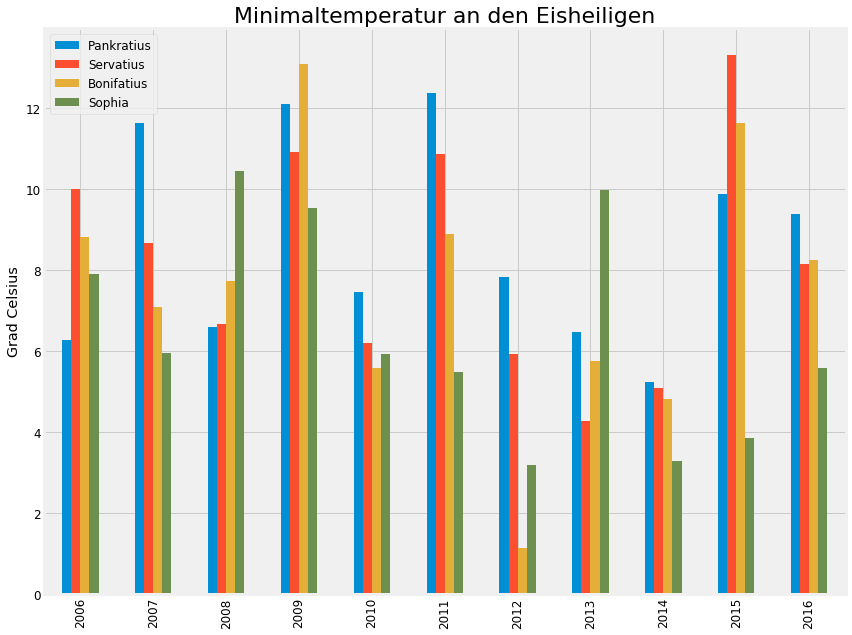

In [23]:
fig, ax = plt.subplots(figsize=(12,9))
df_minimum.loc[[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]][['Pankratius', 'Servatius', 'Bonifatius', 'Sophia']].plot(kind='bar', ax=ax)
plt.title('Minimaltemperatur an den Eisheiligen', fontsize=22)
plt.rcParams.update({'font.size': 12})
plt.xlabel('')
plt.ylabel('Grad Celsius')
plt.tight_layout()
plt.show()
fig.savefig('output/eisheilige_minimaltemp.png')